In [1]:
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
import distributed

In [2]:
client = distributed.Client()
client

Client Scheduler: tcp://127.0.0.1:46843 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 3 Cores: 6 Memory: 16.74 GB


1. For 3 different simulations: historical, RCP4.5, RCP 8.5 generate benthic and surface layers for: O2, PH, T, S, NO3, integrated PP, speed, MLD. 
- These should be generated in a tiff format. The TIFF files should be georeferenced (contain projection information, even if layers are WGS84 – unprojected. GIS hub primarily uses the BC Albers projection (EPSG: 3005). 
- These should be calculated for spring/summer and fall/winter 
- Total layers: 3 simulations*( 6vars*2+ 1PP +1MLD) = 42 layers 
- Standardized names should be used that correspond to existing nomenclature (ie. NEP36-CanOE_historical_1986-2005_varname_season_bottom.tif) 


In [58]:
a = np.array([[1,2,np.nan],[3,np.nan, np.nan],[6,7,8]])
a

array([[ 1.,  2., nan],
       [ 3., nan, nan],
       [ 6.,  7.,  8.]])

In [107]:
i = ((~np.isnan(A)).sum(axis = 1) - 1).compute()

In [108]:
i

<xarray.DataArray 'O2' (t: 12, lat: 715, lon: 715)>
array([[[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
...
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]]])
Coordinates:
  * lat      (lat) float32 44.33 44.35 44.38 44.4 ... 59.55 59.57 59.59 59.61
  * lon      (lon) float32 -142.3 -142.3 -142.2 -142.2 ... -120.6 -120.6 -120.6
  * t        (t) <U12 'fallwinter' 'fallwinter' ... 'fallwinter' 'fallwinter'

In [112]:
da.groupby('t').mean('t').isel(deptht=i)

IndexError: Dimensions of indexers mismatch: (slice(None, None, None), <xarray.Variable (t: 12, lat: 715, lon: 715)>
array([[[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
...
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]],

       [[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]]]), slice(None, None, None), slice(None, None, None))

In [110]:
simulations = ['historical_1986-2005', 
               'RCP45_2046-2065', 
               'RCP85_2046-2065']


In [127]:
simluation='historical'
varname='O2'
simulation_short = simulation.split('_')[0]
ncfile = f'NEP36-CanOE/RegularGrid_715x715/{simulation_short}/NEP36-CanOE_{varname}_{simulation}_monthly_715x715.nc'
print(ncfile)

ds = xr.open_dataset(ncfile, chunks={'t':12, 'lat':100})
ds['t'] = ['fallwinter', 'fallwinter', 'springsummer',     # JFM
           'springsummer', 'springsummer', 'springsummer', # AMJ
           'springsummer', 'springsummer', 'fallwinter',   # JAS
           'fallwinter', 'fallwinter', 'fallwinter'        # OND
  ]
darr = ds[varname]
darr_mean = darr.groupby('t').mean('t').compute()

# find index of "bottom"
bottom_index = darr_mean.notnull().sum('deptht') - 1

for season in ['springsummer', 'fallwinter']:
    for level in ['surface', 'bottom']:
        if level=='surface':
            deptht_index = 0
        else: # bottom
            deptht_index = bottom_index
            
        darr_level = da_mean.isel(deptht=deptht_index).sel(t=season)
        darr_level.rio.set_crs('EPSG:4362', inplace=True) 
        filename = f'NEP36-CanOE_{simulation}_1986-2005_{varname}_{season}_{level}.tif'
        darr_level.rio.to_raster(filename)


NEP36-CanOE/RegularGrid_715x715/historical/NEP36-CanOE_O2_historical_1986-2005_monthly_715x715.nc


In [17]:
def process_climate_output(simulation, varname):
    
    simulation_short = simulation.split('_')[0]
    ncfile = f'NEP36-CanOE/RegularGrid_715x715/{simulation_short}/NEP36-CanOE_{varname}_{simulation}_monthly_715x715.nc'
    print(ncfile)
    
    ds = xr.open_dataset(ncfile, chunks={'t':12, 'lat':715, 'lon':715})
    ds['t'] = ['fallwinter', 'fallwinter', 'springsummer',     # JFM
               'springsummer', 'springsummer', 'springsummer', # AMJ
               'springsummer', 'springsummer', 'fallwinter',   # JAS
               'fallwinter', 'fallwinter', 'fallwinter'        # OND
          ]
    da = ds[varname]

    depth = da.notnull().sum('deptht')

    da_surface = da.isel(deptht=0).groupby('t').mean('t')
    da_benthic = da.where(depth>0).isel(deptht=(depth-1))
    da_benthic = da_benthic.groupby('t').mean('t')

    for season in ['springsummer', 'fallwinter']:
        da = da_benthic.sel(t=season)
        da.rio.set_crs('EPSG:4362', inplace=True)
        da.rio.to_raster(f'NEP36-CanOE_{simulation}_1986-2005_{varname}_{season}_bottom.tif')

        da = da_surface.sel(t=season)
        da.rio.set_crs('EPSG:4362', inplace=True)
        da.rio.to_raster(f'NEP36-CanOE_{simulation}_1986-2005_{varname}_{season}_surface.tif')


## O2

In [18]:
%%time
varname = 'O2'
simulation = 'historical_1986-2005'
process_climate_output(simulation=simulation, varname=varname)

NEP36-CanOE/RegularGrid_715x715/historical/NEP36-CanOE_O2_historical_1986-2005_monthly_715x715.nc


TypeError: unexpected indexer type for VectorizedIndexer: dask.array<sub, shape=(12, 715, 715), dtype=int64, chunksize=(12, 715, 715), chunktype=numpy.ndarray>

## T

In [80]:
%%time
varname = 'temp'
for simulation in simulations:
    process_climate_output(simulation=simulation, varname=varname)
    

NEP36-CanOE/RegularGrid_715x715/historical/NEP36-CanOE_temp_historical_1986-2005_monthly_715x715.nc
NEP36-CanOE/RegularGrid_715x715/RCP45/NEP36-CanOE_temp_RCP45_2046-2065_monthly_715x715.nc
NEP36-CanOE/RegularGrid_715x715/RCP85/NEP36-CanOE_temp_RCP85_2046-2065_monthly_715x715.nc
CPU times: user 13.1 s, sys: 3.78 s, total: 16.9 s
Wall time: 17 s


In [82]:
%%time
varname = 'temp'
for simulation in simulations:
    process_climate_output(simulation=simulation, varname=varname)
 

NEP36-CanOE/RegularGrid_715x715/historical/NEP36-CanOE_temp_historical_1986-2005_monthly_715x715.nc
NEP36-CanOE/RegularGrid_715x715/RCP45/NEP36-CanOE_temp_RCP45_2046-2065_monthly_715x715.nc
NEP36-CanOE/RegularGrid_715x715/RCP85/NEP36-CanOE_temp_RCP85_2046-2065_monthly_715x715.nc
CPU times: user 12.9 s, sys: 2.88 s, total: 15.8 s
Wall time: 16.4 s


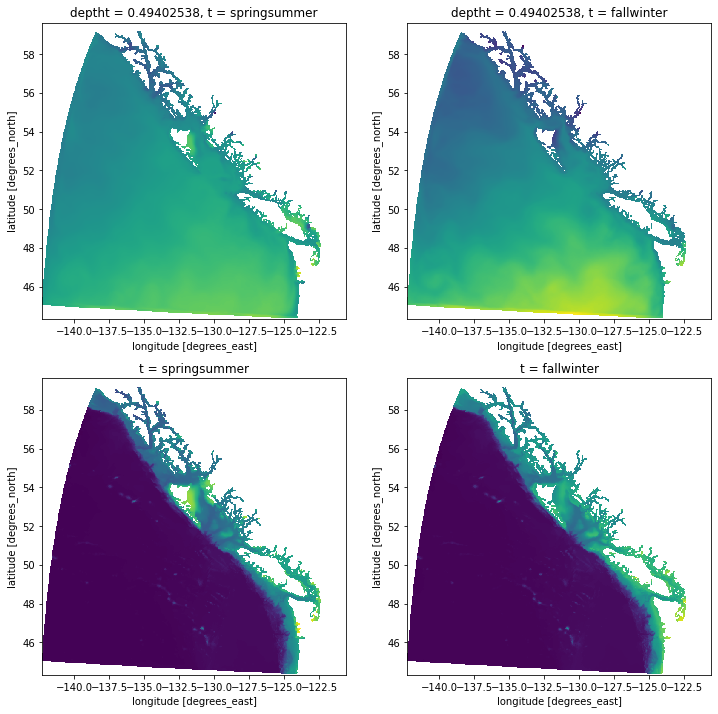

In [55]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

da_surface.sel(t='springsummer').plot(ax=ax1, add_colorbar=False)
da_surface.sel(t='fallwinter').plot(ax=ax2, add_colorbar=False)
da_benthic.sel(t='springsummer').plot(ax=ax3, add_colorbar=False)
da_benthic.sel(t='fallwinter').plot(ax=ax4, add_colorbar=False)

plt.show()


In [5]:
ds_surface = ds.isel(deptht=0).groupby('t').mean('t')

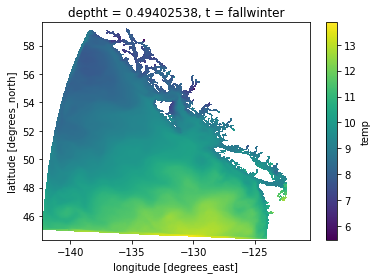

In [6]:
ds_surface.temp.sel(t='fallwinter').plot()

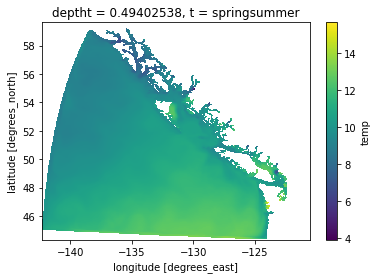

In [7]:
ds_surface.temp.sel(t='springsummer').plot()

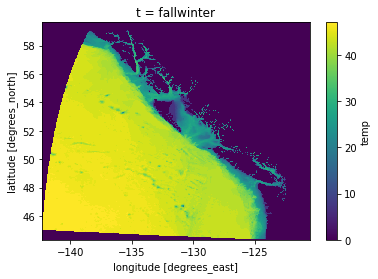

In [10]:
depth.isel(t=0).plot()

In [11]:
ds_benthic = temp.where(depth>0).isel(deptht=(depth-1)).groupby('t').mean('t')

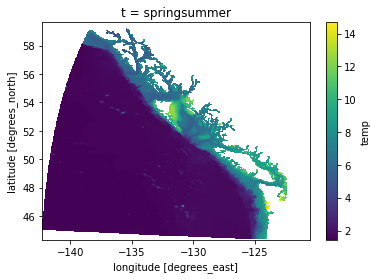

In [12]:
ds_benthic.sel(t='springsummer').plot()

<xarray.DataArray 'temp' (t: 2, lat: 715, lon: 715)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 44.33 44.35 44.38 44.4 ... 59.55 59.57 59.59 59.61
  * lon      (lon) float32 -142.3 -142.3 -142.2 -142.2 ... -120.6 -120.6 -120.6
  * t        (t) object 'fallwinter' 'springsummer'

In [62]:
def write_season(season):
    varname = "temp"
    simulation = "historical"
    ds = ds_benthic.sel(t=season)
    ds.rio.set_crs('EPSG:4362', inplace=True)
    ds.rio.to_raster(f'NEP36-CanOE_{simulation}_1986-2005_{varname}_{season}_bottom.tif')
    
write_season('springsummer')
write_season('fallwinter')

In [63]:
ls

NEP36-CanOE/
NEP36-CanOE_historical_1986-2005_temp_fallwinter_bottom.tif
NEP36-CanOE_historical_1986-2005_temp_springsummer_bottom.tif
README.md
environment.yml
extract_surface_temp.py
fallwinter_temp.tif
notebook.ipynb
springsummer_temp.tif
temp.tif
temperature.ipynb


In [64]:
!rio info NEP36-CanOE_historical_1986-2005_temp_fallwinter_bottom.tif

{"bounds": [-142.29837702369156, 59.62234430553533, -120.55606175804672, 44.32197255847835], "colorinterp": ["gray"], "count": 1, "crs": "GEOCCS[\"NAD83(HARN) (geocentric)\",DATUM[\"NAD83_High_Accuracy_Reference_Network\",SPHEROID[\"GRS 1980\",6378137,298.257222101004,AUTHORITY[\"EPSG\",\"7019\"]],AUTHORITY[\"EPSG\",\"6152\"]],PRIMEM[\"Greenwich\",0],UNIT[\"metre\",1],AXIS[\"Geocentric X\",OTHER],AXIS[\"Geocentric Y\",OTHER],AXIS[\"Geocentric Z\",NORTH]]", "descriptions": ["temp"], "driver": "GTiff", "dtype": "float32", "height": 715, "indexes": [1], "interleave": "band", "lnglat": [158.42395754330963, 90.0], "mask_flags": [["all_valid"]], "nodata": null, "res": [0.0304088325393634, -0.021399121324555213], "shape": [715, 715], "tiled": false, "transform": [0.0304088325393634, 0.0, -142.29837702369156, 0.0, 0.021399121324555213, 44.32197255847835, 0.0, 0.0, 1.0], "units": [null], "width": 715}


In [52]:
ds

<xarray.DataArray 'temp' (lat: 715, lon: 715)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 44.33 44.35 44.38 44.4 ... 59.55 59.57 59.59 59.61
  * lon      (lon) float32 -142.3 -142.3 -142.2 -142.2 ... -120.6 -120.6 -120.6
    t        <U12 'springsummer'

"nodata" field for geotiff?